In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_excel(r"D:\ML\3-Regression\Height_Weight_Dataset.xlsx")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


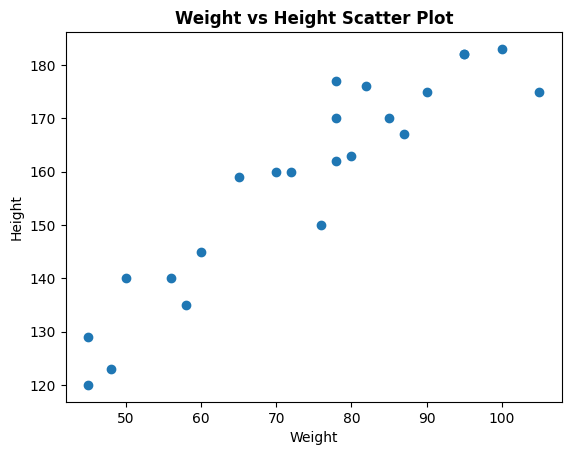

In [11]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height Scatter Plot',weight='bold')
plt.show()

In [12]:
# Segregating Dependent and Independent Features
X = df[['Weight']]
y = df['Height']

In [15]:
X.shape, y.shape

((23, 1), (23,))

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# Standardize Data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

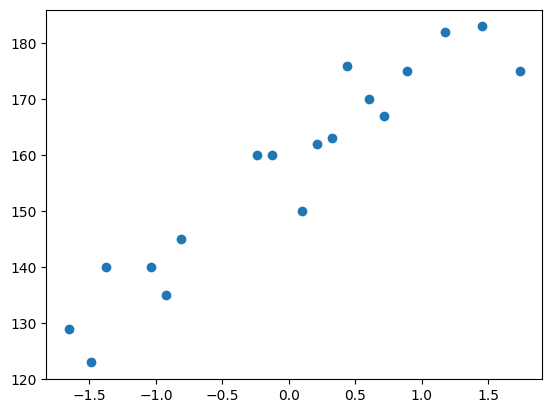

In [20]:
plt.scatter(X_train_scaled,y_train)

In [21]:
# Creating and Training Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)

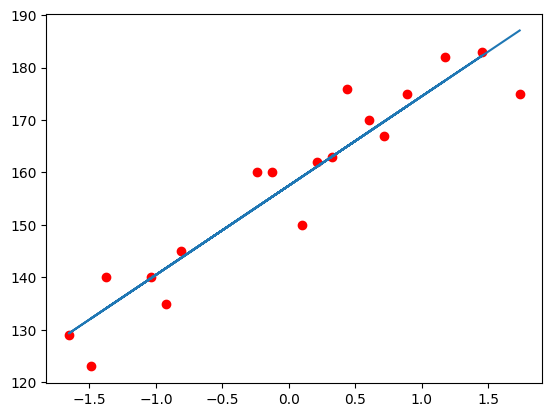

In [23]:
#Plotting the best fit line
plt.scatter(X_train_scaled,y_train,c='r')
plt.plot(X_train_scaled,lin_reg.predict(X_train_scaled))

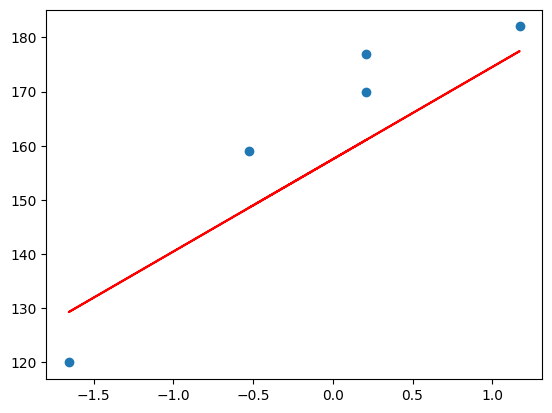

In [26]:
#Plotting the best fit line for test data
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled,y_pred,'r')

In [25]:
print("Intercept:",lin_reg.intercept_)
print("Coefficient:",lin_reg.coef_[0])

Intercept: 157.5
Coefficient: 17.034408719095538


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
print("R2 Score:",r2_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_pred))

#Adj R2 = 1- [(1-R2)*(n-1)/(n-k-1)]
adj_r2 = 1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2:",adj_r2)

R2 Score: 0.776986986042344
Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
Root Mean Squared Error: 10.477400726827081
Adjusted R2: 0.7026493147231252


In [36]:
scaled_weight = scaler.transform([[80]])
scaled_weight

D:\ML\ds\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [37]:
lin_reg.predict(scaled_weight)

array([163.01076266])

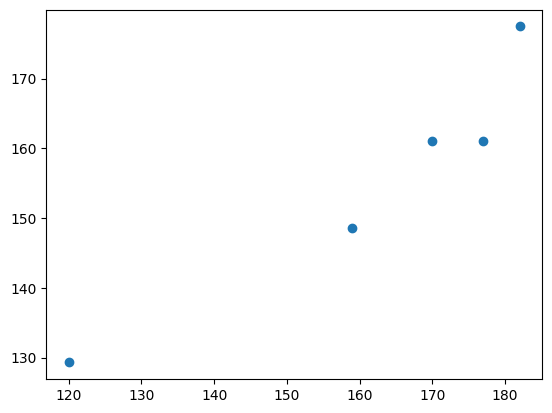

In [46]:
#Scatter Plot 
plt.scatter(y_test,y_pred)
#If it seems like a linear plot, then model performing good

In [47]:
#Residuals
residuals = y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\91748\AppData\Local\Temp\ipykernel_5488\3878226274.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

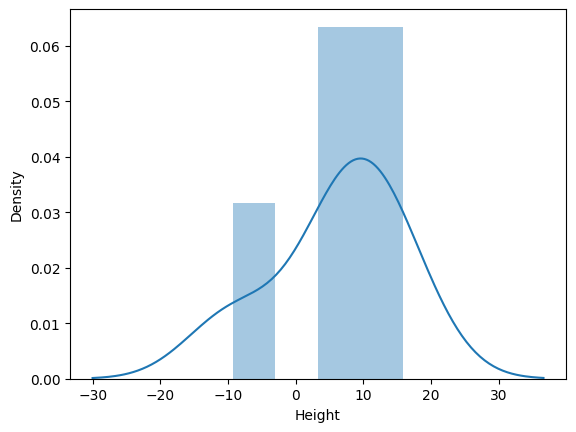

In [63]:
sns.distplot(residuals,kde=True)
#Able to get normal distribution then good

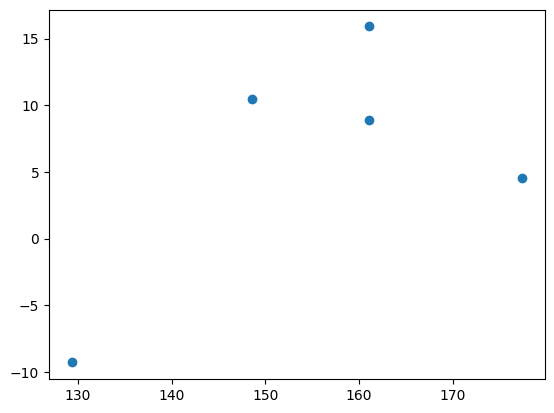

In [65]:
#Plotting a scatter plot between prediction and residuals should be a uniform distribution
plt.scatter(y_pred,residuals)